In [42]:
import pandas as pd
import numpy as np
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score    
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [43]:
train_data = pd.read_csv("Data/cleaned_data.csv")
test_data = pd.read_csv("Data/test_100.csv")
print(train_data.info(verbose=False), test_data.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 85 entries, INCOME to CREDIT_SCORE
dtypes: float64(51), int64(34)
memory usage: 597.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 85 entries, INCOME to CREDIT_SCORE
dtypes: float64(51), int64(34)
memory usage: 66.5 KB
None None


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Assuming train_data and test_data are your training and test datasets

# Step 1: Fit Linear Regression with Cross Validation on Train Data
model = LinearRegression()
cv_scores = cross_val_score(model, train_data.drop(columns=['CREDIT_SCORE']), train_data['CREDIT_SCORE'], cv=5, scoring='neg_mean_squared_error')
# Assuming 'CREDIT_SCORE' is the column you want to predict

# Step 2: Get the best model from cross-validation
best_model_index = np.argmax(cv_scores)
best_model = LinearRegression()
best_model.fit(train_data.drop(columns=['CREDIT_SCORE']), train_data['CREDIT_SCORE'])

# Step 3: Evaluate the model on the Test Data
test_predictions = best_model.predict(test_data.drop(columns=['CREDIT_SCORE']))
r2 = r2_score(test_data['CREDIT_SCORE'], test_predictions)
rmse = mean_squared_error(test_data['CREDIT_SCORE'], test_predictions, squared=False)
mse = mean_squared_error(test_data['CREDIT_SCORE'], test_predictions)
mae = mean_absolute_error(test_data['CREDIT_SCORE'], test_predictions)
mape = mean_absolute_percentage_error(test_data['CREDIT_SCORE'], test_predictions)

scores_dict = {}
scores_dict["R2"] = r2
scores_dict["RMSE"] = rmse
scores_dict["MSE"] = mse
scores_dict["MAE"] = mae
scores_dict["MAPE"] = mape

print(scores_dict)


{'R2': 0.729174474908288, 'RMSE': 31.53355401977658, 'MSE': 994.3650291181679, 'MAE': 22.406139798069848, 'MAPE': 0.03770547176710898}


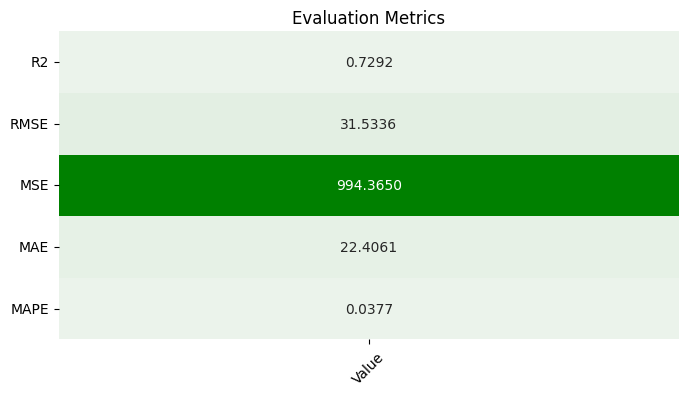

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(scores_dict, orient='index', columns=['Value'])

# Set the color scale for the table
cmap = sns.light_palette("green", as_cmap=True)

# Plot the color-coded table
plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, fmt=".4f", cmap=cmap, cbar=False)
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
